In [12]:
from pathlib import Path

import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
import json

with open("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_3/food-101/food-101/meta/train.json") as f:
    train_json = json.load(f)

with open("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_3/food-101/food-101/meta/test.json") as f:
    test_json = json.load(f)


In [14]:
class_names = sorted(train_json.keys())
class_to_index = {name: i for i, name in enumerate(class_names)}

NUM_CLASSES = len(class_names)
print(class_to_index)


101


In [15]:
IMAGE_ROOT = Path(
    "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_3/food-101/food-101/images")  # root image directory


def build_paths_and_labels(json_data):
    image_paths = []
    labels = []

    for class_name, paths in json_data.items():
        for p in paths:
            image_paths.append(str(IMAGE_ROOT / f"{p}.jpg"))
            labels.append(class_to_index[class_name])

    return image_paths, labels


train_paths, train_labels = build_paths_and_labels(train_json)
val_paths, val_labels = build_paths_and_labels(test_json)


In [16]:


IMG_SIZE = (256, 256)


def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)  # 1 for grayscale, 3 for RGB
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [17]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [32]:
print(train_labels[:20])
print(val_labels[:20])

print(set(train_labels))
print(set(val_labels))


[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomShear(0.2)
])


In [24]:
model = tf.keras.Sequential([

    data_augmentation,

    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(101, activation="softmax")
])


In [33]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [34]:
history_1 = model.fit(train_ds,
                      epochs=5,
                      validation_data=val_ds
                      )

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 669s 282ms/step - accuracy: 0.1133 - loss: 3.3591 - val_accuracy: 0.0099 - val_loss: 8.9747
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 663s 280ms/step - accuracy: 0.1630 - loss: 2.8791 - val_accuracy: 0.0099 - val_loss: 12.0419
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 664s 280ms/step - accuracy: 0.0982 - loss: 3.6564 - val_accuracy: 0.0099 - val_loss: 4.7450
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 647s 273ms/step - accuracy: 0.0063 - loss: 4.7223 - val_accuracy: 0.0102 - val_loss: 4.7789
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 662s 280ms/step - accuracy: 0.1417 - loss: 2.9580 - val_accuracy: 0.0099 - val_loss: 7.4020


In [35]:
SAVE_DIR = "/Users/Bilal/PycharmProjects/LearningAI/models/assignment_7/task_3"
MODEL_PATH = f"{SAVE_DIR}/food.keras"
model.save(MODEL_PATH)

<Axes: >

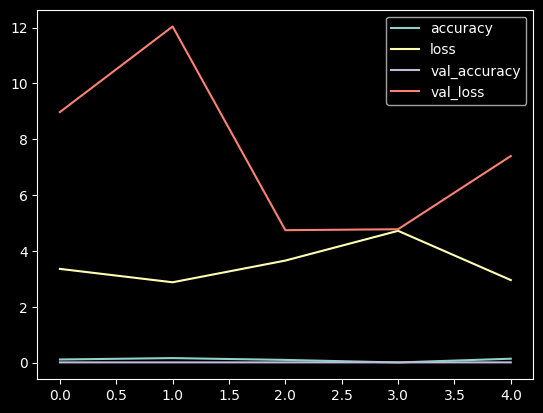

In [36]:
pd.DataFrame(history_1.history).plot()